In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [ ]:
# Data yang digunakan
# Variabel data yang digunakan :
# df,symptom, disease, sym_precaution

df = pd.read_csv(f'https://raw.githubusercontent.com/Yudha-ard/SyncO/machine-learning/MACHINE-LEARNING/MASTERDATA/dataset.csv')
symptom = pd.read_csv(f'https://raw.githubusercontent.com/Yudha-ard/SyncO/machine-learning/MACHINE-LEARNING/MASTERDATA/symptom-severity.csv')
disease = pd.read_csv(f'https://raw.githubusercontent.com/Yudha-ard/SyncO/machine-learning/MACHINE-LEARNING/MASTERDATA/symptom-description.csv')
sym_precaution = pd.read_csv(f'https://raw.githubusercontent.com/Yudha-ard/SyncO/machine-learning/MACHINE-LEARNING/MASTERDATA/symptom-precaution.csv')


**Pre-processing and cleaning Data**


*   Preprocesing Data
*   Menghapus data atribut yang memiliki spasi, garis bawah
*   Cek null dan value NaN




In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Menghapus data atribut yang memiliki spasi, garis bawah**

In [ ]:
for i in df.columns:
    df[i] = df[i].str.replace(" ", "")
    df[i] = df[i].str.replace('_', '')
symptom["Symptom"] = symptom["Symptom"].str.replace('_', "")

In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungalinfection,vomiting,vomiting,fatigue,highfever,headache,nausea,abdominalpain,abdominalpain,yellowingofeyes,yellowingofeyes,irritability,malaise,musclepain,chestpain,chestpain,bloodinsputum,musclepain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


**Cek null dan value NaN**

In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


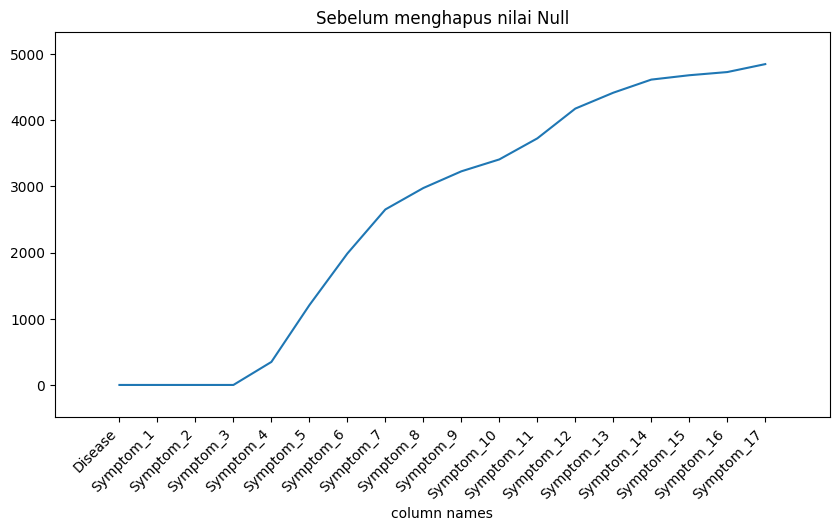

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Sebelum menghapus nilai Null')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

**Menghapus space dari gejala**

In [ ]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungalinfection,itching,skinrash,nodalskineruptions,dischromicpatches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungalinfection,skinrash,nodalskineruptions,dischromicpatches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungalinfection,itching,nodalskineruptions,dischromicpatches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungalinfection,itching,skinrash,dischromicpatches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungalinfection,itching,skinrash,nodalskineruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Normalisasi Data**
Disini merubah nilai NaN menjadi 0 = Tidak



In [ ]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungalinfection,itching,skinrash,nodalskineruptions,dischromicpatches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungalinfection,skinrash,nodalskineruptions,dischromicpatches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungalinfection,itching,nodalskineruptions,dischromicpatches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungalinfection,itching,skinrash,dischromicpatches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungalinfection,itching,skinrash,nodalskineruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Mengecek isi nilai symptoms**

In [ ]:
symptom['Symptom'].unique()

array(['itching', 'skinrash', 'nodalskineruptions', 'continuoussneezing',
       'shivering', 'chills', 'jointpain', 'stomachpain', 'acidity',
       'ulcersontongue', 'musclewasting', 'vomiting',
       'burningmicturition', 'spottingurination', 'fatigue', 'weightgain',
       'anxiety', 'coldhandsandfeets', 'moodswings', 'weightloss',
       'restlessness', 'lethargy', 'patchesinthroat',
       'irregularsugarlevel', 'cough', 'highfever', 'sunkeneyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowishskin', 'darkurine', 'nausea',
       'lossofappetite', 'painbehindtheeyes', 'backpain', 'constipation',
       'abdominalpain', 'diarrhoea', 'mildfever', 'yellowurine',
       'yellowingofeyes', 'acuteliverfailure', 'fluidoverload',
       'swellingofstomach', 'swelledlymphnodes', 'malaise',
       'blurredanddistortedvision', 'phlegm', 'throatirritation',
       'rednessofeyes', 'sinuspressure', 'runnynose', 'congestion',
       'chestpain'

In [ ]:
vals = df.values
symptoms = symptom['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = symptom[symptom['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungalinfection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungalinfection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungalinfection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungalinfection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungalinfection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungalinfection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungalinfection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungalinfection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungalinfection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungalinfection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungalinfection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungalinfection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungalinfection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungalinfection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungalinfection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


In [ ]:
symptom['Symptom'] = symptom['Symptom'].str.replace('_',' ')
symptom.head()

,Symptom,weight
0,itching,1
1,skinrash,3
2,nodalskineruptions,4
3,continuoussneezing,4
4,shivering,5


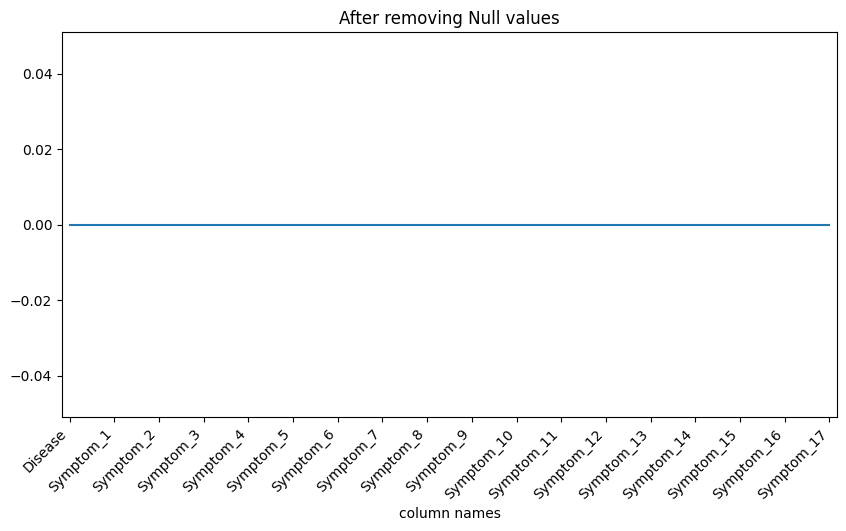

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [ ]:
print("Number of symptoms used to identify the disease ",len(symptom['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [ ]:
df['Disease'].unique()

array(['Fungalinfection', 'Allergy', 'GERD', 'Chroniccholestasis',
       'DrugReaction', 'Pepticulcerdiseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'BronchialAsthma', 'Hypertension', 'Migraine',
       'Cervicalspondylosis', 'Paralysis(brainhemorrhage)', 'Jaundice',
       'Malaria', 'Chickenpox', 'Dengue', 'Typhoid', 'hepatitisA',
       'HepatitisB', 'HepatitisC', 'HepatitisD', 'HepatitisE',
       'Alcoholichepatitis', 'Tuberculosis', 'CommonCold', 'Pneumonia',
       'Dimorphichemmorhoids(piles)', 'Heartattack', 'Varicoseveins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo)ParoymsalPositionalVertigo', 'Acne',
       'Urinarytractinfection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


**Random Forest**

In [ ]:
rfc=RandomForestClassifier(random_state=42)

rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
print(x_test[0])
print(preds[0])
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

[3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Acne
F1-score% = 99.14564591749411 | Accuracy% = 99.1869918699187


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 98.984%, Standard Deviation: (0.56%)


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 97.966%, Standard Deviation: (1.29%)


**Deploy Decision Tree Model**

In [ ]:
import joblib

In [ ]:
joblib.dump(rfc, "/content/sample_data/disease_model.joblib")

['/content/sample_data/disease_model.joblib']

In [ ]:
loaded_rfc = joblib.load("/content/sample_data/disease_model.joblib")

In [ ]:
def predd(x, S1, S2, S3, S4, S5, S6, S7, S8, S9, S10, S11, S12, S13, S14, S15, S16, S17):
    psymptoms = [S1, S2, S3, S4, S5, S6, S7, S8, S9, S10, S11, S12, S13, S14, S15, S16, S17]

    a = np.array(symptom["Symptom"])
    b = np.array(symptom["weight"])

    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j] == a[k]:
                psymptoms[j] = b[k]

    psy = [psymptoms]
    pred2 = x.predict(psy)

    disp = disease[disease['Disease'] == pred2[0]]
    if not disp.empty:
        disp = disp.values[0][1]
    else:
        disp = "Description not found"

    # Check if any rows are found before accessing index
    rows_found = np.where(sym_precaution['Disease'] == pred2[0])[0]
    if len(rows_found) > 0:
        c = rows_found[0]
        precaution_list = []
        if len(sym_precaution.iloc[c]) > 1:
            for i in range(1, len(sym_precaution.iloc[c])):
                precaution_list.append(sym_precaution.iloc[c, i])
        else:
            precaution_list = ["No precautions found."]
    else:
        precaution_list = ["No precautions found."]

    print("The Disease Name: ", pred2[0])
    print("The Disease Description: ", disp)
    print("Recommended Things to do at home: ")
    for i in precaution_list:
        print(i)


In [ ]:
n_groups = 1
algorithms = ('Random Forest')
train_accuracy = (rnd_forest_train.mean()*100.0, rnd_forest_train.mean()*100.0,)
test_accuracy = (rnd_forest_test.mean()*100.0, rnd_forest_test.mean()*100.0)
Standard_Deviation=(rnd_forest_test.std()*100.0, rnd_forest_test.std()*100.0)

In [ ]:
sympList=symptom["Symptom"].to_list()

print(len(sympList),"\n")
print(sympList,"\n")

print(sympList[7],sympList[5],sympList[2],sympList[80])
predd(rnd_forest,sympList[7],sympList[5],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0)

133 

['itching', 'skinrash', 'nodalskineruptions', 'continuoussneezing', 'shivering', 'chills', 'jointpain', 'stomachpain', 'acidity', 'ulcersontongue', 'musclewasting', 'vomiting', 'burningmicturition', 'spottingurination', 'fatigue', 'weightgain', 'anxiety', 'coldhandsandfeets', 'moodswings', 'weightloss', 'restlessness', 'lethargy', 'patchesinthroat', 'irregularsugarlevel', 'cough', 'highfever', 'sunkeneyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowishskin', 'darkurine', 'nausea', 'lossofappetite', 'painbehindtheeyes', 'backpain', 'constipation', 'abdominalpain', 'diarrhoea', 'mildfever', 'yellowurine', 'yellowingofeyes', 'acuteliverfailure', 'fluidoverload', 'swellingofstomach', 'swelledlymphnodes', 'malaise', 'blurredanddistortedvision', 'phlegm', 'throatirritation', 'rednessofeyes', 'sinuspressure', 'runnynose', 'congestion', 'chestpain', 'weaknessinlimbs', 'fastheartrate', 'painduringbowelmovements', 'paininanalregion', 'bloodystool', 'irr

The Disease Name:  Paralysis (brain hemorrhage)
The Disease Discription:  Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Recommended Things to do at home:
massage
eat healthy
exercise
consult doctor